In [ ]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Imported Libraries

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time

# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections


# Other Libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv('/content/creditcard.csv')
df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
for column in df.columns[1:31]:  # Columns V5 to V20
    df[column] = df[column].round(2)

In [ ]:
# The classes are heavily skewed we need to solve this issue later.
print('No Frauds =', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds =', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

No Frauds = 99.83 % of the dataset
Frauds = 0.17 % of the dataset


Text(0.5, 1.0, 'Class Distributions (0: No Fraud & 1: Fraud)')

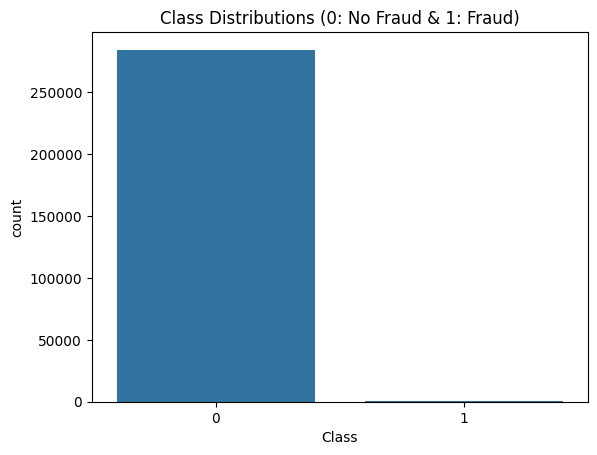

In [ ]:
sns.countplot(x='Class', data=df)
plt.title('Class Distributions (0: No Fraud & 1: Fraud)', fontsize=12)

In [ ]:
df.drop(['Time','Amount'], axis=1, inplace=True)

In [ ]:
df['Class'] = df['Class'].astype(int)


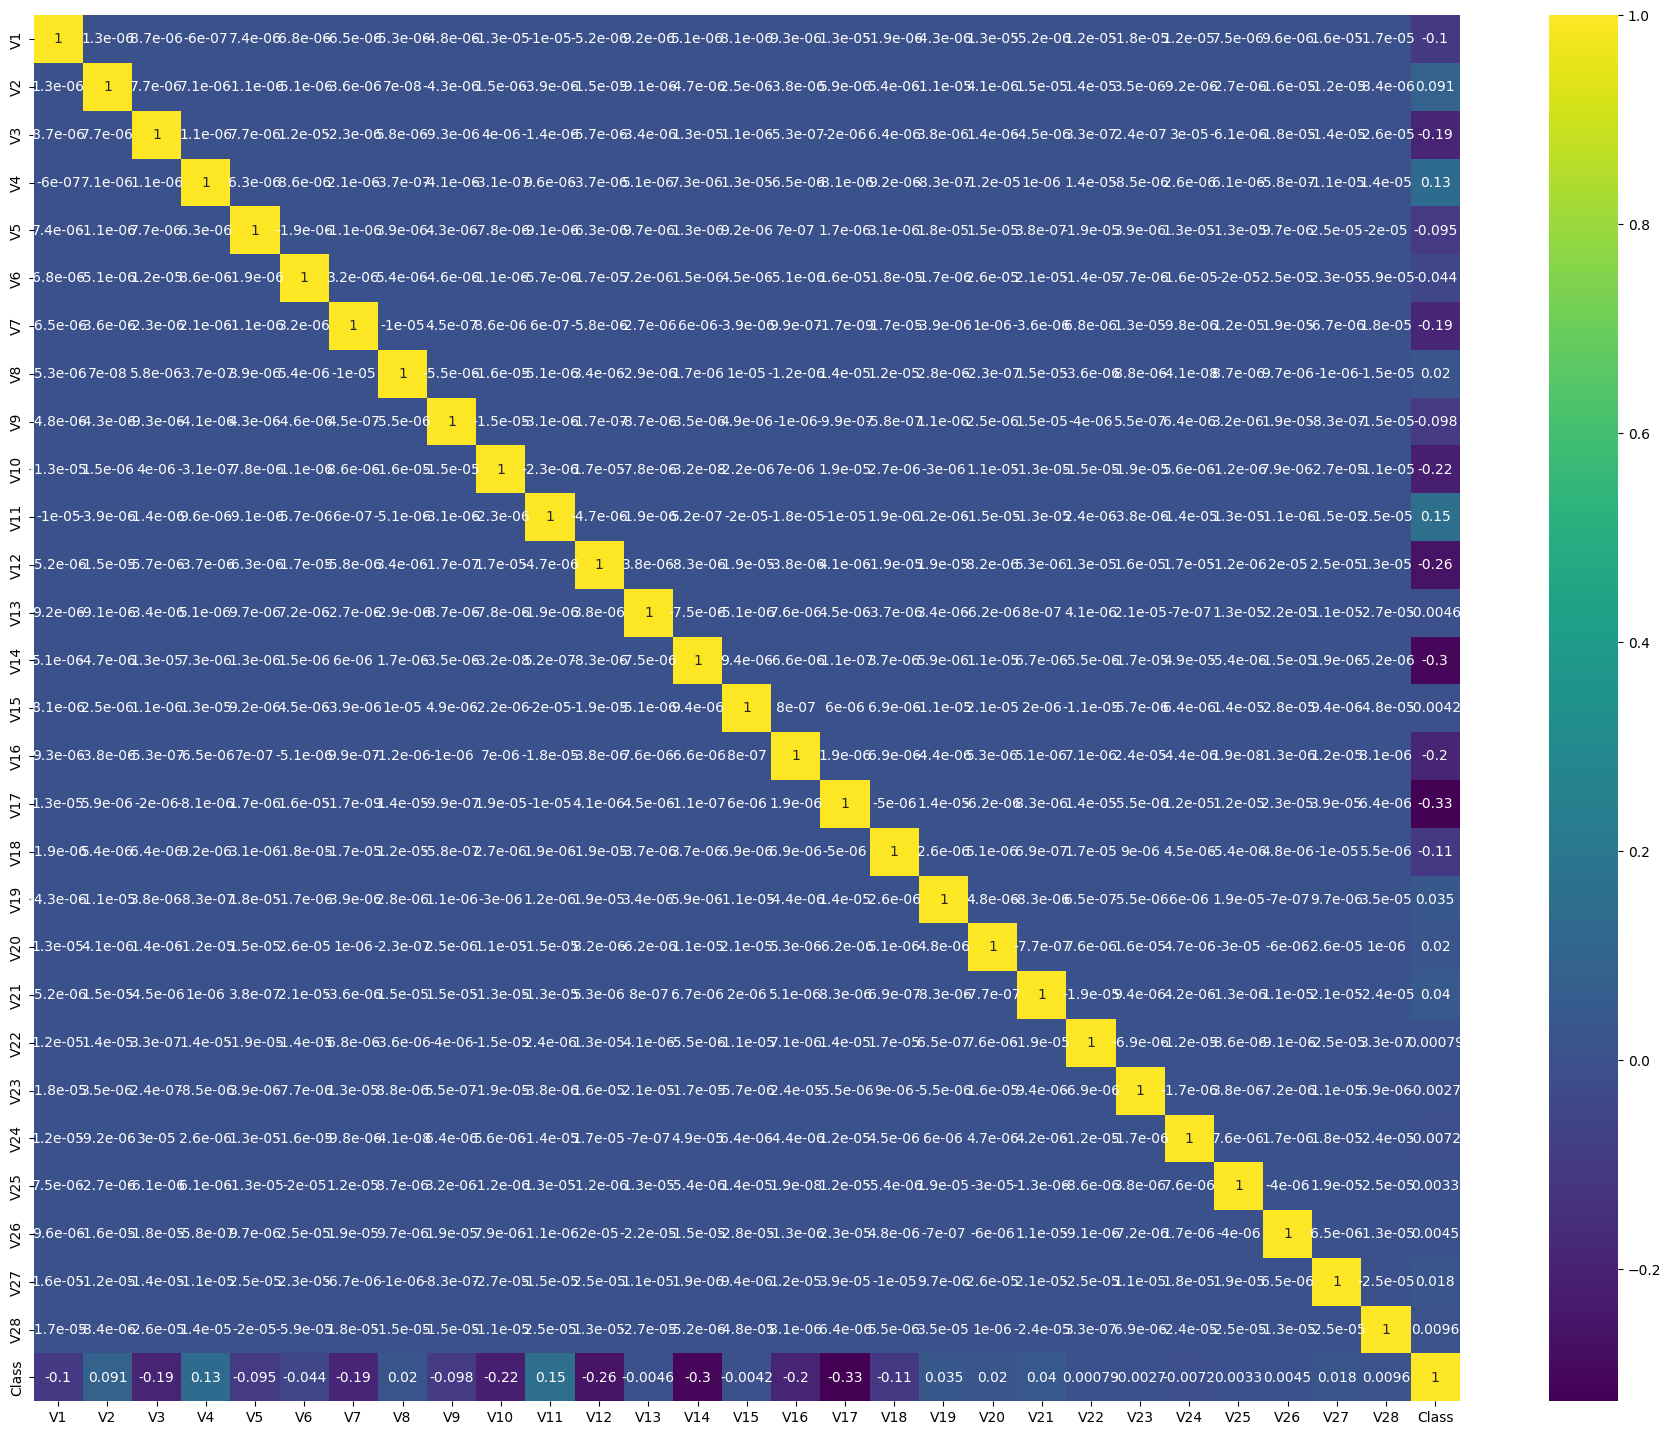

In [ ]:
corr = df.corr()
plt.figure(figsize=(23,18))
sns.heatmap(corr, annot=True, cmap='viridis')
plt.show()

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler

X = df.drop(columns=['Class'])
y = df['Class']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20, random_state=42)

In [ ]:
from imblearn.over_sampling import SMOTE
X_res,y_res = SMOTE().fit_resample(X,y)
y_res.value_counts()

0    284315
1    284315
Name: Class, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_res,y_res,test_size=0.20,
                                                 random_state=42)

# **Logistic Regression**

In [ ]:
log = LogisticRegression()
log.fit(X_train,y_train)
LogisticRegression()
y_pred1 = log.predict(X_test)
accuracy_score(y_test,y_pred1)

0.944832316268927

In [ ]:
print('Precision - ', precision_score(y_test,y_pred1))
print('Recall - ',recall_score(y_test,y_pred1))
print('F1 Score - ', f1_score(y_test,y_pred1))

Precision -  0.9739390540287904
Recall -  0.914349901713002
F1 Score -  0.9432042438397334


# **Decision Tree**

In [ ]:
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)

y_pred2 = dt.predict(X_test)
accuracy_score(y_test,y_pred2)




0.9985491444348698

In [ ]:
print('Precision - ', precision_score(y_test,y_pred2))
print('Recall - ',recall_score(y_test,y_pred2))
print('F1 Score - ', f1_score(y_test,y_pred2))

Precision -  0.9979140738663255
Recall -  0.9991926425161471
F1 Score -  0.9985529489147117


# **Random Forest**

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
RandomForestClassifier()
y_pred3 = rf.predict(X_test)
accuracy_score(y_test,y_pred3)


0.9998944832316269

In [ ]:
print('Precision - ', precision_score(y_test,y_pred3))
print('Recall - ',recall_score(y_test,y_pred3))
print('F1 Score - ', f1_score(y_test,y_pred3))

Precision -  0.9998069701330151
Recall -  0.999982448750351
F1 Score -  0.9998947017426862


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.metrics import classification_report

# Create an ANN model
model = Sequential()
model.add(Dense(units=128, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Training
history = model.fit(X_train, y_train, batch_size=32, epochs=5, validation_split=0.2)
print('\n')
print('\n')
# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Predict on the test data
y_pred = model.predict(X_test)
y_pred_labels = (y_pred > 0.5).astype(int)

print('\n')
print('\n')
# Print classification report and confusion matrix
report = classification_report(y_test, y_pred_labels)
print("Classification Report of ANN:\n", report)



Epoch 1/5
11373/11373 [==============================] - 30s 3ms/step - loss: 0.0186 - accuracy: 0.9940 - val_loss: 0.0056 - val_accuracy: 0.9990
Epoch 2/5
11373/11373 [==============================] - 27s 2ms/step - loss: 0.0055 - accuracy: 0.9986 - val_loss: 0.0038 - val_accuracy: 0.9991
Epoch 3/5
11373/11373 [==============================] - 29s 3ms/step - loss: 0.0044 - accuracy: 0.9990 - val_loss: 0.0030 - val_accuracy: 0.9994
Epoch 4/5
11373/11373 [==============================] - 33s 3ms/step - loss: 0.0034 - accuracy: 0.9992 - val_loss: 0.0055 - val_accuracy: 0.9986
Epoch 5/5
11373/11373 [==============================] - 29s 3ms/step - loss: 0.0028 - accuracy: 0.9993 - val_loss: 0.0023 - val_accuracy: 0.9996




3554/3554 [==============================] - 6s 2ms/step - loss: 0.0024 - accuracy: 0.9996
Test Loss: 0.0024
Test Accuracy: 0.9996
3554/3554 [==============================] - 5s 1ms/step




Classification Report of ANN:
               precision    recall  f1-score

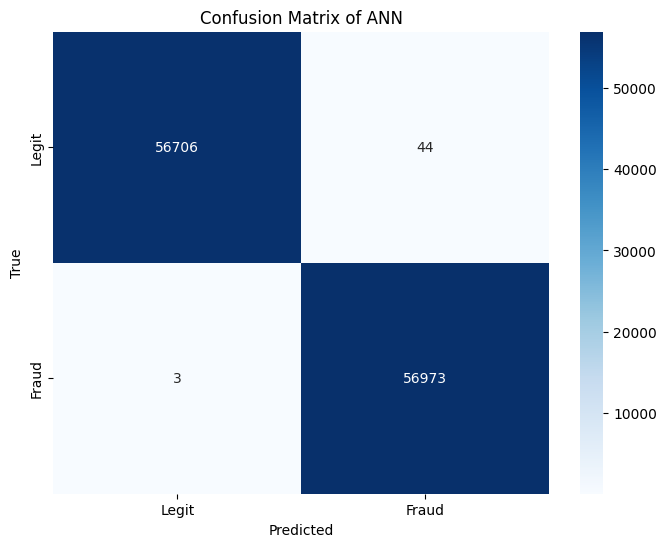

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Legit', 'Fraud'], yticklabels=['Legit', 'Fraud'])
plt.title("Confusion Matrix of ANN")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

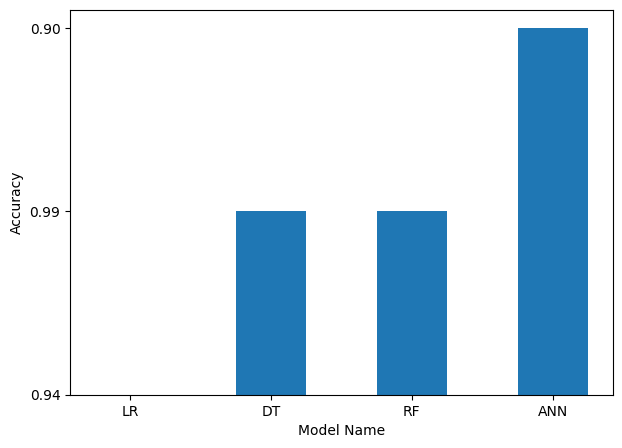

In [ ]:
plt.figure(figsize=(7, 5))
plt.bar(['LR', 'DT','RF', 'ANN'],['0.94', '0.99', '0.99', '0.90' ], width=0.5)
plt.xlabel("Model Name")
plt.ylabel("Accuracy")
plt.show()

In [ ]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 535.7/535.7 kB 4.3 MB/s eta 0:00:00


In [ ]:
from shap import TreeExplainer
import matplotlib.pyplot as plt
import shap

# load JS visualization code to notebook
shap.initjs()

# Create the explainer
explainer = TreeExplainer(dt)

"""
Compute shap_values for all of X_test rather instead of
a single row, to have more data for plot.
"""
shap_values = explainer.shap_values(X_train)

Variable Importance Plot - Global Interpretation


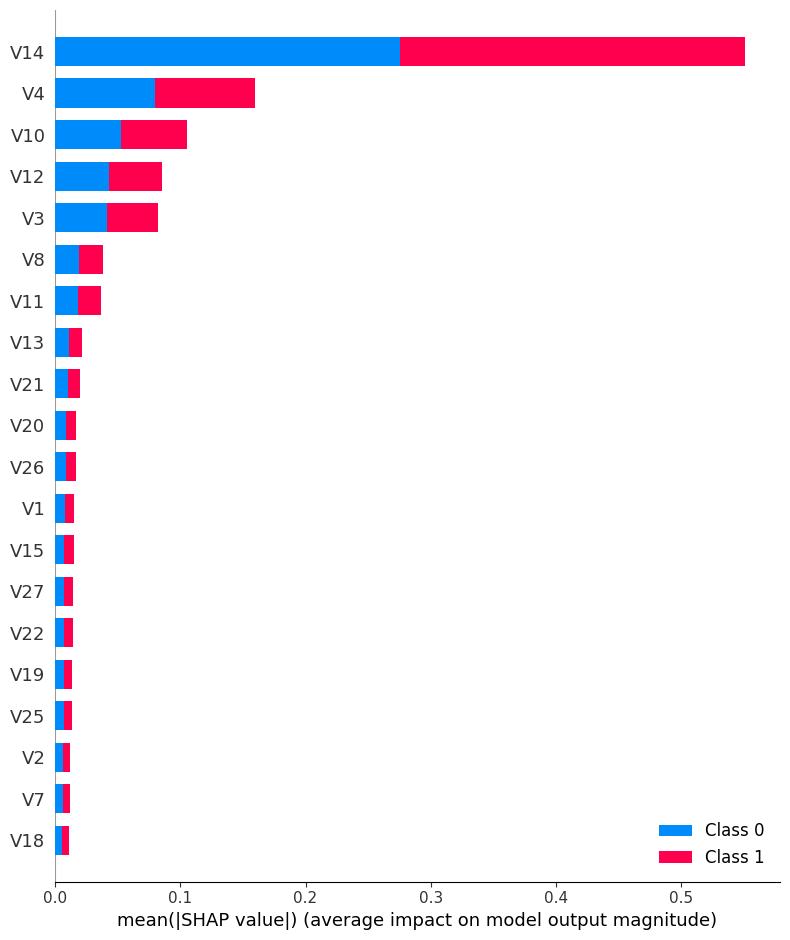

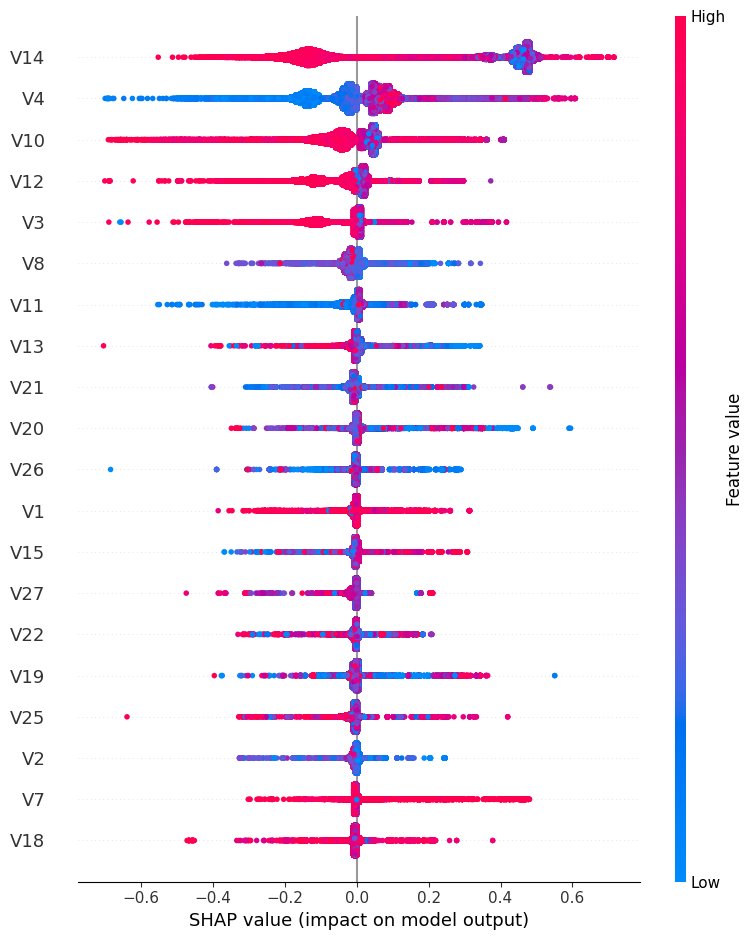

In [ ]:
feature_names = X_train.columns

print("Variable Importance Plot - Global Interpretation")
figure = plt.figure()
shap.summary_plot(shap_values, X_train, feature_names=feature_names)

# Summary Plot Deep-Dive on Label 1
shap.summary_plot(shap_values[1], X_train, feature_names=feature_names)

In [ ]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 5.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283835 sha256=765e18a2fb3d418eb27fc02a25fba10f51d95e8cbc17b69c456c3597e0f04f0d
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [ ]:
# Import the LimeTabularExplainer module
from lime.lime_tabular import LimeTabularExplainer

# Get the class names
class_names = ['Legit', 'Fraud']

# Get the feature names
feature_names = X_train.columns

# Fit the Explainer on the training data set using the LimeTabularExplainer
explainer = LimeTabularExplainer(X_train.values, feature_names=feature_names,
                                 class_names=class_names, mode='classification')

In [ ]:
# Convert X_test back to a DataFrame
X_test_df = pd.DataFrame(X_test, columns=feature_names)

# Perform the explanation on the 8th instance in the test data
explanation = explainer.explain_instance(X_test_df.iloc[10], dt.predict_proba)

# Show the result of the model's explanation
explanation.show_in_notebook(show_table=True, show_all=False)

In [ ]:
# Save Model

import pickle
with open('model_pickle.pkl','wb') as file:
    pickle.dump(dt,file)